# **1. Import Required Libraries**

These libraries handle data processing, visualization, and machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# **2. Load and Explore the Data**

Load the Iris dataset, inspect its structure, and check for missing values.

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Iris.csv')

# Drop unnecessary columns
if 'Id' in data.columns:
    data = data.drop(columns=['Id'])

# Display data overview
print(data.head())
print(data.info())
print(data.isnull().sum())  # Check for missing values


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          

# **3. Visualize the Data**

Visualizations help us understand feature relationships and correlations.

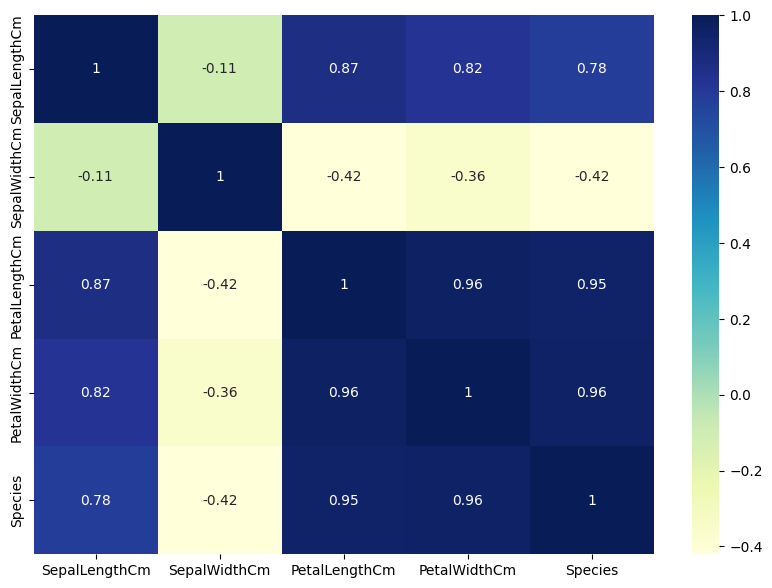

In [ ]:
# Encode target variable (Species) as numeric
data['Species'] = data['Species'].astype('category').cat.codes

# Heatmap for feature correlation (only numerical columns)
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()


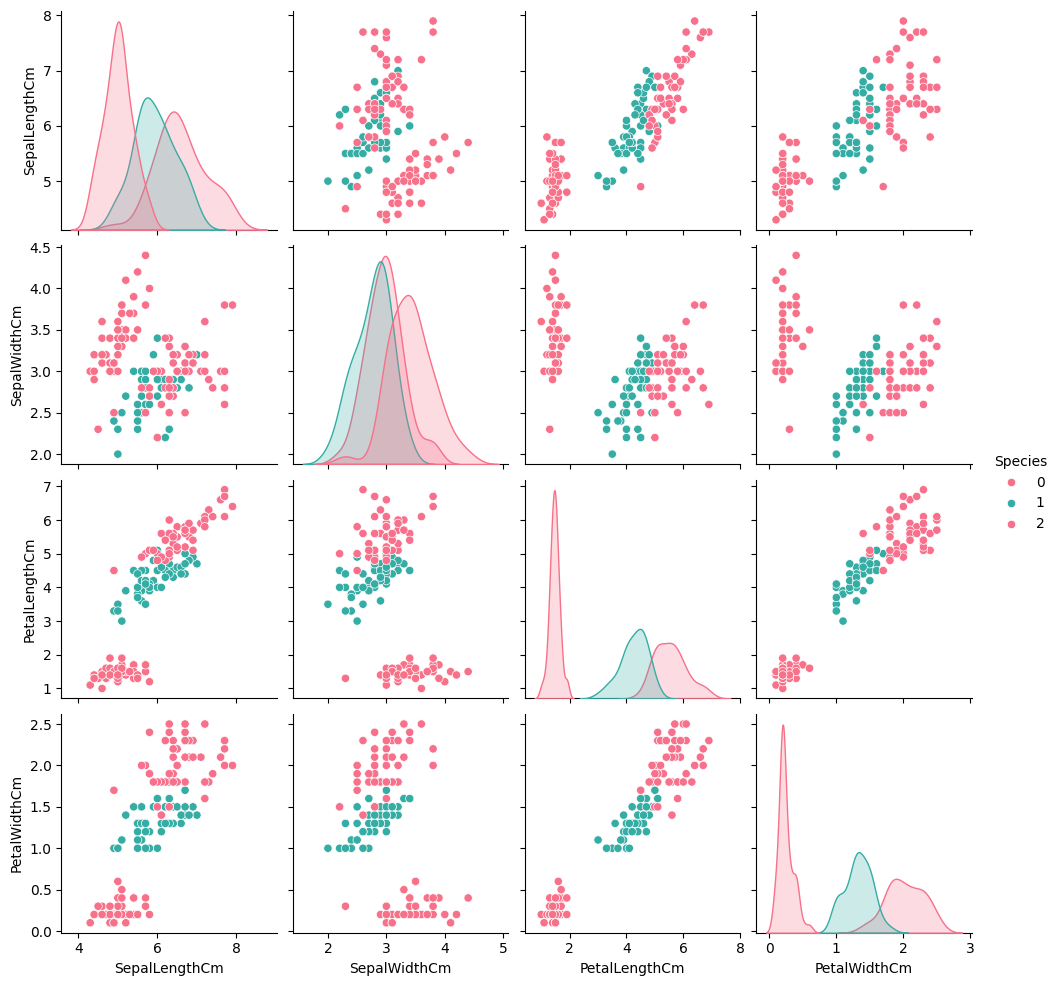

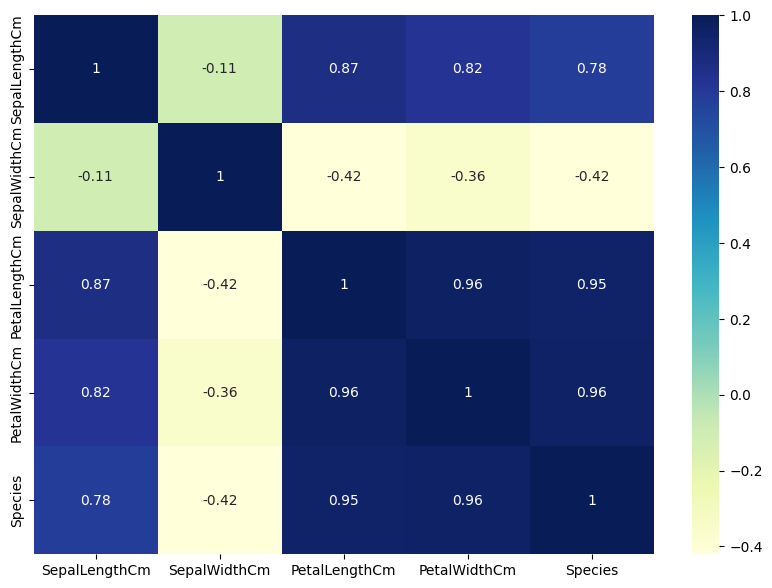

In [ ]:
# Pairplot to visualize feature relationships
sns.pairplot(data, hue="Species", palette="husl")
plt.show()

# Heatmap for feature correlation
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()


# **4. Data Preprocessing**

We encode the target variable (Species), split the data, and scale the features for better model performance.

In [ ]:
# Encode target variable
data['Species'] = data['Species'].astype('category').cat.codes

# Separate features and target
X = data.drop(columns='Species')
y = data['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **5. Train and Evaluate Models**

Train multiple machine learning models and evaluate their accuracy, classification report, and confusion matrices.


Model: Logistic Regression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



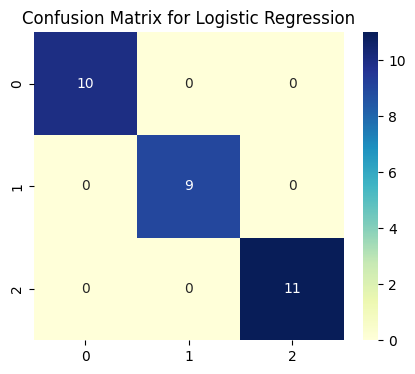


Model: K-Nearest Neighbors
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



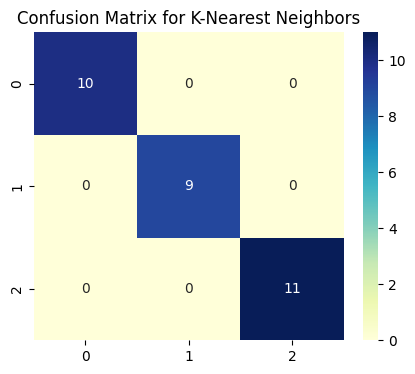


Model: Support Vector Machine
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



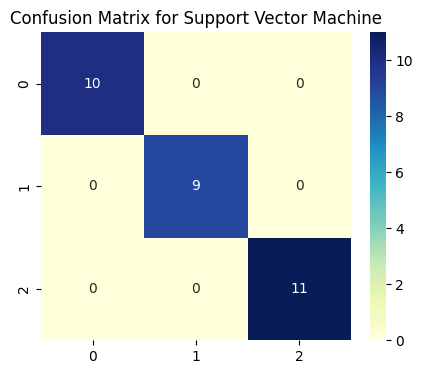


Model: Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



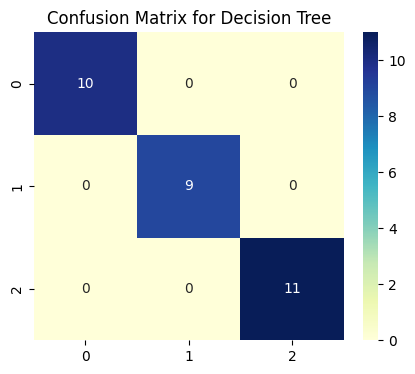


Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



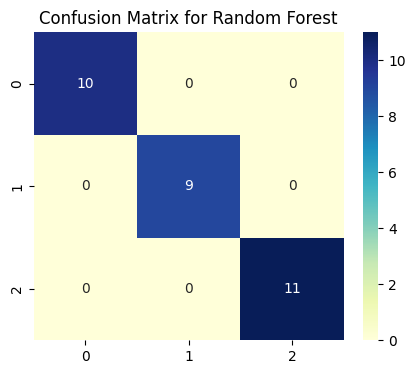

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train model
    y_pred = model.predict(X_test_scaled)  # Predict

    # Print model performance
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="YlGnBu")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


# **6. Identify Best Model**

Select the best-performing model based on accuracy.

In [ ]:
best_model_name = max(models, key=lambda name: accuracy_score(y_test, models[name].predict(X_test_scaled)))
print(f"\nBest Model: {best_model_name}")



Best Model: Logistic Regression
